# Prueba

## Preparación del Notebook

### Importación de Librerías

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import opendatasets as od

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.metrics import accuracy_scor

### Descarga de Datasets desde Kaggle

In [2]:
od.download("https://www.kaggle.com/c/titanic/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

### Carga de Datasets

In [3]:
#train_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/train.csv"
train_folder = "titanic/train.csv"
train_df = pd.read_csv(train_folder)

In [4]:
#test_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/test.csv"
test_folder = "titanic/test.csv"
test_df = pd.read_csv(test_folder)

In [5]:
del train_df['PassengerId']
del train_df['Name']

In [6]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Se elimina la columna de Cabina por la cantidad de datos nulos.

In [7]:
del train_df['Cabin']

Para la Categoría de punto de Embarque, se reemplzan los 2 datos nulos por la moda

In [8]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train_df['Embarked'].loc[pd.isnull(train_df['Embarked'])] = 'S'

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\440429920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Embarked'].loc[pd.isnull(train_df['Embarked'])] = 'S'


Los datos faltantes en edad se completan con el promedio

In [10]:
mean_age_train = np.mean(train_df['Age'].loc[pd.isnull(train_df['Age']) == False].values)
train_df['Age'].loc[pd.isnull(train_df['Age'])] = mean_age_train

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\1166638194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'].loc[pd.isnull(train_df['Age'])] = mean_age_train


### Codificación

In [11]:
df_bkp = train_df.copy()
from sklearn.preprocessing import OrdinalEncoder
train_df['Sex'] = OrdinalEncoder().fit_transform(train_df['Sex'].values.reshape((-1, 1)))
train_df['Ticket'] = OrdinalEncoder().fit_transform(train_df['Ticket'].values.reshape((-1, 1)))
train_df['Embarked'] = OrdinalEncoder().fit_transform(train_df['Embarked'].values.reshape((-1, 1)))

In [12]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.000000,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,101.0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,14.0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,675.0,23.4500,2.0
889,1,1,1.0,26.000000,0,0,8.0,30.0000,0.0


### Visualización

### Pclass

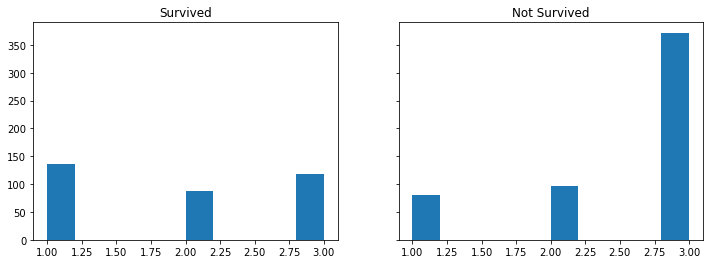

### Sex

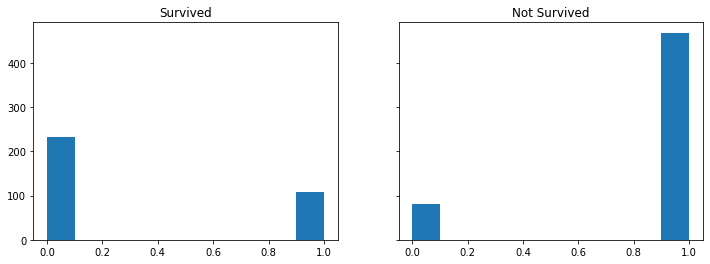

### Age

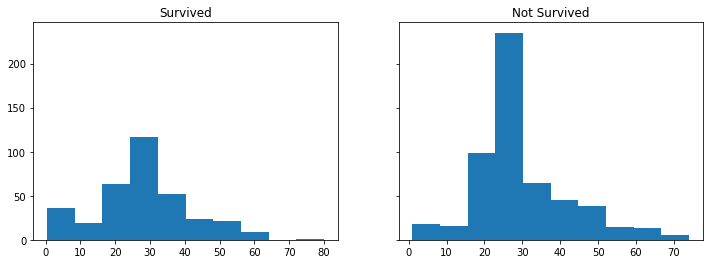

### SibSp

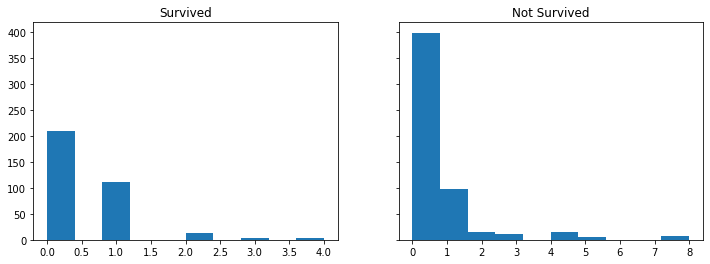

### Parch

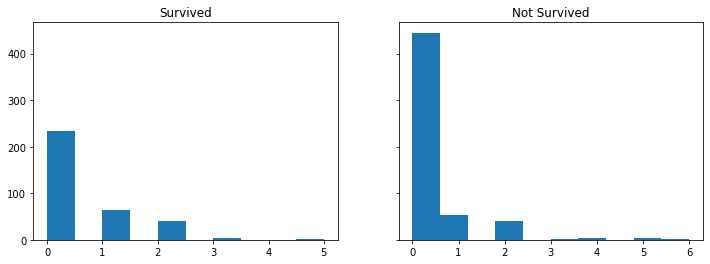

### Ticket

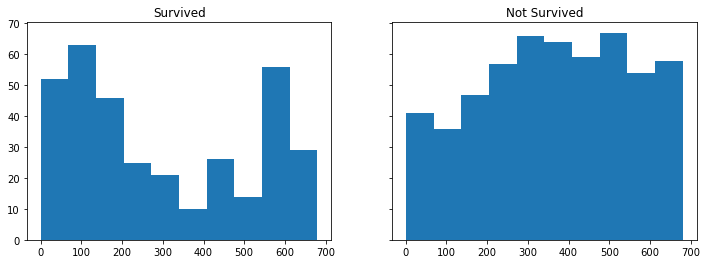

### Fare

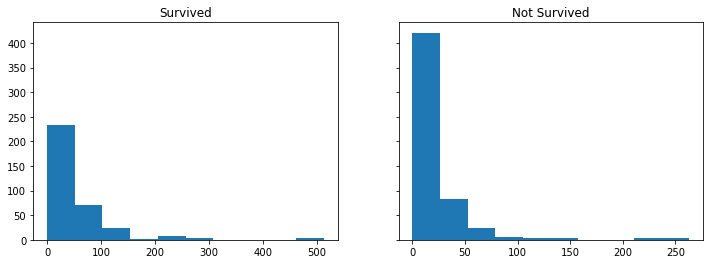

### Embarked

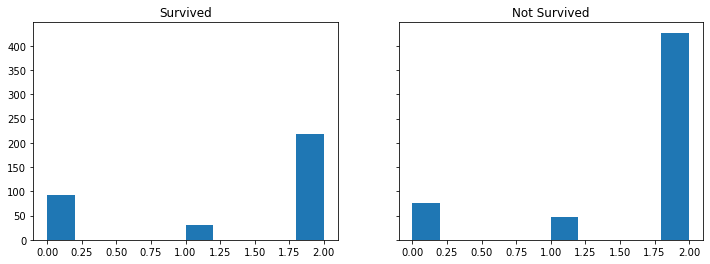

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def show(txt):
    # this function is for printing markdown in jupyter notebook
    display(Markdown(txt))
for i in range(1, 9):
    show(f'### {train_df.columns[i]}')
    f, (survived, not_survived) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
    survived.hist(train_df.iloc[np.where(train_df['Survived'] == 1)[0], i])
    survived.set_title('Survived')
    not_survived.hist(train_df.iloc[np.where(train_df['Survived'] == 0)[0], i])
    not_survived.set_title('Not Survived')
    plt.show()

In [14]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [16]:
# Multi-Layer Perceptron
mlpc = MLPClassifier()
mlpc_score = np.mean(cross_val_score(mlpc, X, y))
print(f'Multi-Layer Perceptron: {mlpc_score}')

Multi-Layer Perceptron: 0.739689912748729


In [19]:
train_df = df_bkp.copy()

In [22]:
from sklearn.preprocessing import OneHotEncoder
# Pclass
pclass_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
pclass_transf.fit(train_df['Pclass'].values.reshape((-1, 1)))
pclass = pclass_transf.transform(train_df['Pclass'].values.reshape((-1, 1)))
train_df['Pclass0'] = pclass[:, 0]
train_df['Pclass1'] = pclass[:, 1]
train_df['Pclass2'] = pclass[:, 2]
del train_df['Pclass']
# Sex
gender_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
gender_transf.fit(train_df['Sex'].values.reshape((-1, 1)))
gender = gender_transf.transform(train_df['Sex'].values.reshape((-1, 1)))
train_df['Male'] = gender[:, 0]
train_df['Female'] = gender[:, 1]
del train_df['Sex']
# Ticket
ticket_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
ticket_transf.fit(train_df['Ticket'].values.reshape((-1, 1)))
ticket = ticket_transf.transform(train_df['Ticket'].values.reshape((-1, 1)))
for i in range(ticket.shape[1]):
    train_df[f'Ticket{i}'] = ticket[:, i]
del train_df['Ticket']
# Embarked
embarked_transf = OneHotEncoder(sparse=False, dtype=np.uint8, handle_unknown='ignore')
embarked_transf.fit(train_df['Embarked'].values.reshape((-1, 1)))
embarked = embarked_transf.transform(train_df['Embarked'].values.reshape((-1, 1)))
for i in range(embarked.shape[1]):
    train_df[f'Embarked{i}'] = embarked[:, i]
del train_df['Embarked']

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'Ticket{i}'] = ticket[:, i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_17252\2248962618.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [24]:
from sklearn.preprocessing import MinMaxScaler
age_transf = MinMaxScaler().fit(train_df['Age'].values.reshape(-1, 1))
train_df['Age'] = age_transf.transform(train_df['Age'].values.reshape(-1, 1))
sibsp_transf = MinMaxScaler().fit(train_df['SibSp'].values.reshape(-1, 1))
train_df['SibSp'] = sibsp_transf.transform(train_df['SibSp'].values.reshape(-1, 1))
parch_transf = MinMaxScaler().fit(train_df['Parch'].values.reshape(-1, 1))
train_df['Parch'] = parch_transf.transform(train_df['Parch'].values.reshape(-1, 1))
fare_transf = MinMaxScaler().fit(train_df['Fare'].values.reshape(-1, 1))
train_df['Fare'] = fare_transf.transform(train_df['Fare'].values.reshape(-1, 1))

In [25]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

In [26]:
# Multi-Layer Perceptron
mlpc = MLPClassifier()
mlpc_score = np.mean(cross_val_score(mlpc, X, y))
print(f'Multi-Layer Perceptron: {mlpc_score}')

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron: 0.8159249262444291


C:\Users\pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
